<a href="https://colab.research.google.com/github/SJhawar1010/NLP/blob/main/Satyam_554_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('/content/drive/MyDrive/NLP Datasets/seattle-weather.csv')
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
def drop_outlier(data,col_name):
    z= np.abs(stats.zscore(col_name))
    data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
drop_outlier(data,data['precipitation'])
drop_outlier(data,data['temp_max'])
drop_outlier(data,data['temp_min'])
drop_outlier(data,data['wind'])

In [5]:
data=data.drop(columns='date')
sc=StandardScaler()

In [6]:
for i in data.drop(columns='weather').columns:
    data[i]=sc.fit_transform(data[[i]])
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,-0.503221,-0.540252,-0.679922,1.265942,drizzle
1,2.239635,-0.840696,-1.123174,1.108110,rain
2,-0.301911,-0.690474,-0.236670,-0.628046,rain
4,-0.176092,-1.072858,-1.123174,2.370769,rain
5,0.125874,-1.687403,-1.244060,-0.706962,rain


In [7]:
X=data.drop(columns='weather')
le=LabelEncoder()
Y=le.fit_transform(data['weather'])
Y= to_categorical(Y)
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,stratify=Y,test_size=0.2)

In [8]:
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Input
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(Input(shape=(X_train.shape[1],1)))
model.add(LSTM(32, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 32)             4352      
                                                                 
 dropout (Dropout)           (None, 4, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             24832     
                                                                 
 dropout_1 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               98816     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 5)                 6

In [11]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=50,validation_data=(X_val, Y_val))


Epoch 1/50
35/35 [==============================] - 14s 84ms/step - loss: 1.4749 - accuracy: 0.4088 - val_loss: 1.1168 - val_accuracy: 0.4161
Epoch 2/50
35/35 [==============================] - 1s 19ms/step - loss: 1.1385 - accuracy: 0.4252 - val_loss: 1.0934 - val_accuracy: 0.4161
Epoch 3/50
35/35 [==============================] - 1s 18ms/step - loss: 1.1116 - accuracy: 0.4708 - val_loss: 1.0870 - val_accuracy: 0.4161
Epoch 4/50
35/35 [==============================] - 1s 17ms/step - loss: 1.0879 - accuracy: 0.4836 - val_loss: 1.0518 - val_accuracy: 0.5620
Epoch 5/50
35/35 [==============================] - 1s 18ms/step - loss: 1.0458 - accuracy: 0.5520 - val_loss: 0.9597 - val_accuracy: 0.6496
Epoch 6/50
35/35 [==============================] - 1s 17ms/step - loss: 0.9340 - accuracy: 0.6715 - val_loss: 0.8075 - val_accuracy: 0.7153
Epoch 7/50
35/35 [==============================] - 1s 17ms/step - loss: 0.7912 - accuracy: 0.7263 - val_loss: 0.6446 - val_accuracy: 0.8029
Epoch 8/50
3

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

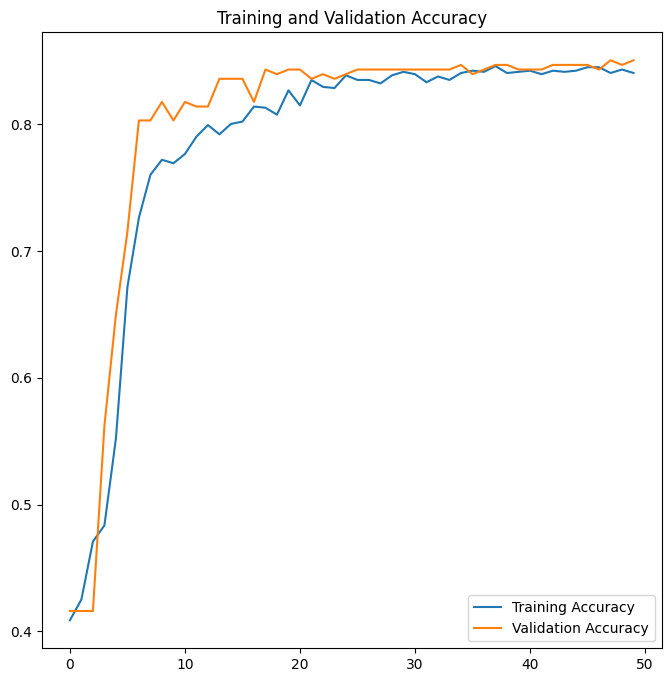

In [13]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

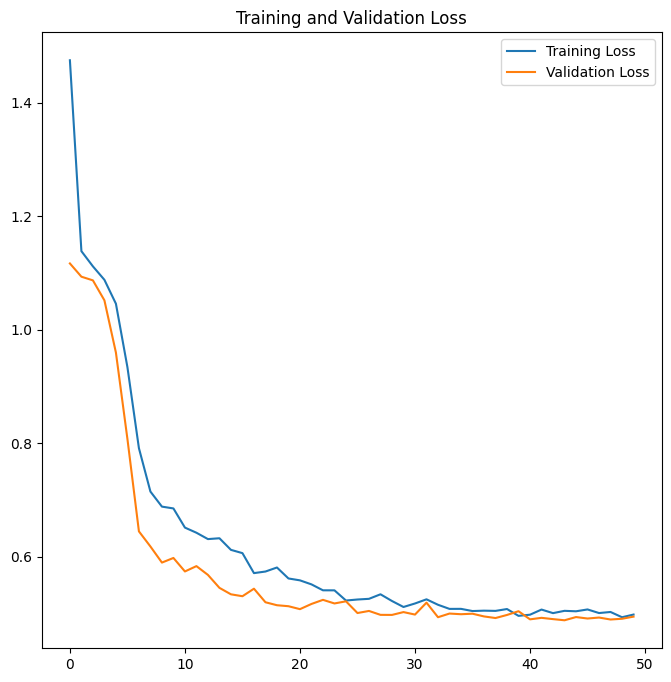

In [14]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
import nltk
from googletrans import Translator

In [17]:
def translate_text(text, source_lang, dest_lang):
    translator = Translator()
    translated = translator.translate(text, src=source_lang, dest=dest_lang)
    return translated.text

In [20]:
input_text = "Hello, My Name is Satyam Jhawar."
translated_text = translate_text(input_text,'english','bengali')
print("Translated Text:", translated_text)

Translated Text: হ্যালো, আমার নাম সত্যম ঝাওয়ার।
